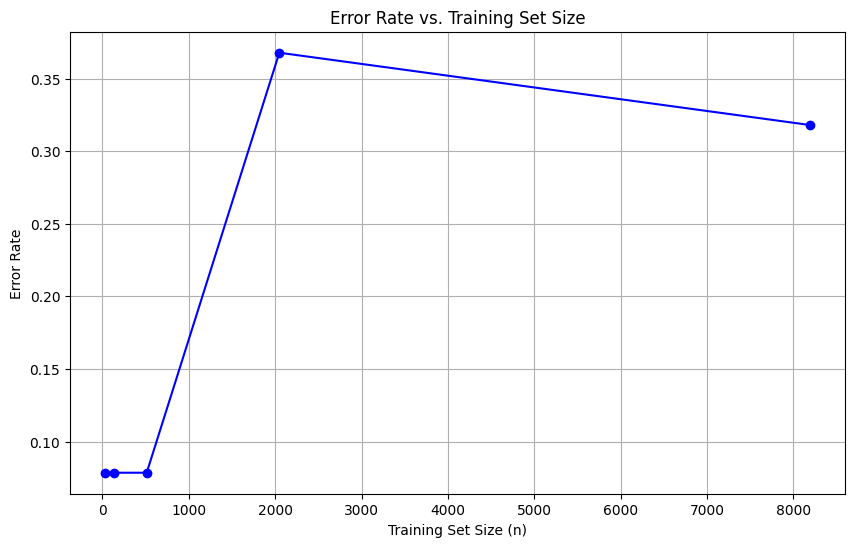

Training Set Size (n): 32, Number of Nodes: 1, Error Rate: 0.07853982300884954
Training Set Size (n): 128, Number of Nodes: 1, Error Rate: 0.07853982300884954
Training Set Size (n): 512, Number of Nodes: 1, Error Rate: 0.07853982300884954
Training Set Size (n): 2048, Number of Nodes: 67, Error Rate: 0.36780973451327437
Training Set Size (n): 8192, Number of Nodes: 231, Error Rate: 0.31803097345132747


In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Step 1: Create or load your dataset (for example, using make_classification)
col_names = ['x_0','x_1','y']
D= pd.read_csv('Dbig.txt', sep=" ",names=col_names)

training_size = [32, 128, 512, 2048, 8192]
n_values = []
err_values = []
for T in training_size:
    D_T=D.head(T)
    D_rest= D.tail(10000-8192)
    X_T = D_T.drop('y',axis='columns')
    y_T = D_T['y']
    y_test=D_rest['y']
    X_test=D_rest.drop('y',axis='columns')

     # Create and train the classifier
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_T, y_T)
    
    #  Calculate the number of nodes in the tree
    n_nodes = clf.tree_.node_count
    
    # Make predictions and calculate the error rate on the test set
    y_pred = clf.predict(X_test)
    err_rate = 1 - accuracy_score(y_test, y_pred)

     # Step 5: Store the results
    n_values.append(n_nodes)
    err_values.append(err_rate)

# Step 6: Plot n vs. errn
plt.figure(figsize=(10, 6))
plt.plot(training_size, err_values, marker='o', linestyle='-', color='b')
plt.xlabel('Training Set Size (n)')
plt.ylabel('Error Rate')
plt.title('Error Rate vs. Training Set Size')
plt.grid(True)
plt.show()

# Display the results
for n, nodes, err in zip(training_size, n_values, err_values):
    print(f"Training Set Size (n): {n}, Number of Nodes: {nodes}, Error Rate: {err}")
